# Leemos el archivo excel

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


C:\Users\HP6470b\AppData\Local\Temp\ipykernel_4544\1291012262.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dfv0 = pd.read_excel("homicidios.xlsx", sheet_name='VICTIMAS')

In [15]:
dfv0.to_excel("victimas.xlsx")

# Realizar análisis exploratorio de datos para la hoja de victimas

In [3]:
dfv0.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


# Exponemos los valoress nulos y duplicados

In [4]:
dfv0.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

# Verificamos tipo de datos

In [5]:
tipos_de_datos = dfv0.dtypes
print (tipos_de_datos)

ID_hecho                       object
FECHA                  datetime64[ns]
AAAA                            int64
MM                              int64
DD                              int64
ROL                            object
VICTIMA                        object
SEXO                           object
EDAD                           object
FECHA_FALLECIMIENTO            object
dtype: object


# Eliminar laa columnas: AAAA,MM, DD. Por ser redundantes

In [6]:
dfv0 = dfv0.drop(columns=['AAAA' , "MM", "DD"])

# Eliminar las filas que contienen el valor "SD" en cualquier columna

In [8]:

dfv0 = dfv0[dfv0.apply(lambda row: not any(row == "SD"), axis=1)]


# Las edades mas frecuentes dentro de nuestros registros de Siniestros con finales fatales

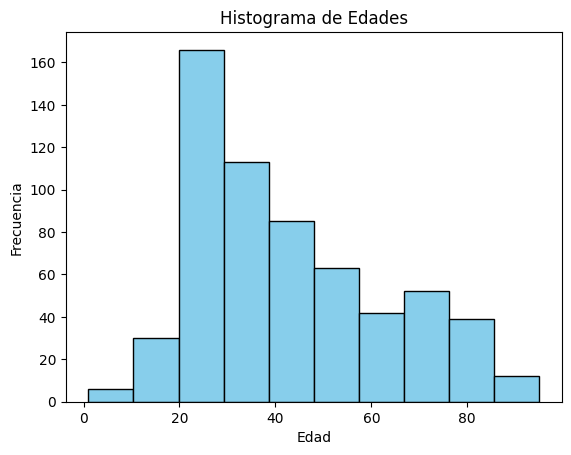

In [9]:
# Crear histograma
plt.hist(dfv0['EDAD'], bins=10, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')

# Mostrar gráfico
plt.show()

# Contar la cantidad de incidentes por tipo de vehículo

El vehiculo con mas tendencia a accidentes letales y por ende el menos seguro es la Moto , podemos afirmar con severa confianza que se necesitan mas reglamentacion como tambien una fuerte campaña de normas vehiculares

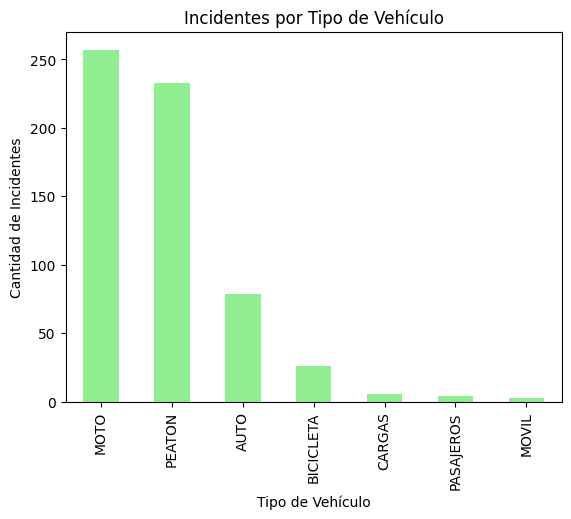

In [10]:

conteo_vehiculos = dfv0['VICTIMA'].value_counts()

# Crear gráfico de barras
conteo_vehiculos.plot(kind='bar', color='lightgreen')

# Agregar etiquetas y título
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad de Incidentes')
plt.title('Incidentes por Tipo de Vehículo')

# Mostrar gráfico
plt.show()

# Contar la cantidad de víctimas por género

La hipotesis que podemos manejar en base a los dos ultimos graficos , es que en ayuda a este fenomeno de que el genero masculino contemple un casi 80% como victima de los siniestro esta que los conductores principales por amplia mayoria de motos son las personas de dicho genero.

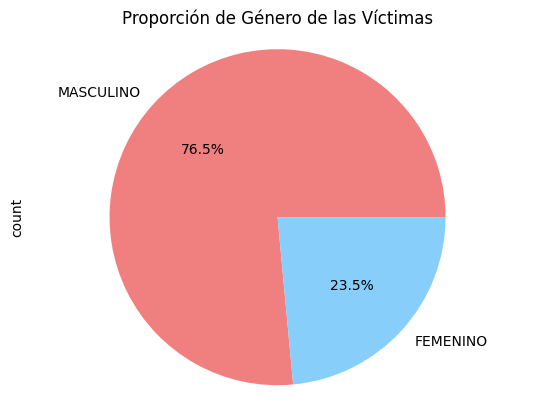

In [12]:

conteo_genero = dfv0['SEXO'].value_counts()

# Crear diagrama de pastel
conteo_genero.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])

# Agregar título
plt.title('Proporción de Género de las Víctimas')

# Mostrar gráfico
plt.axis('equal')
plt.show()

# Calcular la cantidad de incidentes para cada tipo de víctima en cada año

Podemos resaltar con cierta gravedad como el Peaton es la victima mas frecuentes en los siniestos registrados en el año 2018 con su punto mas alto registrado para posteriormente tener una tendencia bajista ; por otra parte resaltamos como pasajeros , cargas y bicicleta se mantienen alejado de los patrones de los demas y contemplan una tendencia baja y casi uniforme.

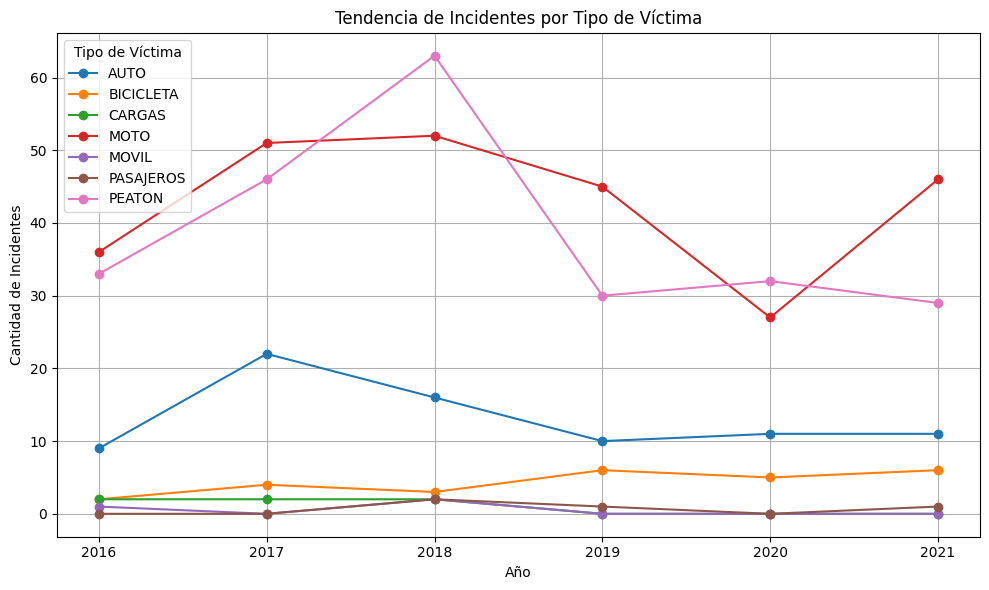

In [14]:
# Convertir la columna 'FECHA' a formato de fecha
dfv0['FECHA'] = pd.to_datetime(dfv0['FECHA'], format='%d/%m/%Y')

# Crear una columna para el año de cada incidente
dfv0['AÑO'] = dfv0['FECHA'].dt.year

# Calcular la cantidad de incidentes para cada tipo de víctima en cada año
incidentes_por_victima = dfv0.groupby(['AÑO', 'VICTIMA']).size().unstack(fill_value=0)

# Visualizar la tendencia a lo largo de los años para cada tipo de víctima
incidentes_por_victima.plot(kind='line', marker='o', figsize=(10, 6))

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Incidentes')
plt.title('Tendencia de Incidentes por Tipo de Víctima')

# Mostrar leyenda
plt.legend(title='Tipo de Víctima', loc='upper left')

# Mostrar gráfico
plt.grid(True)
plt.tight_layout()
plt.show()